In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [164]:
basetable = pd.read_csv('basetable_ex2_4.csv')
print(basetable.info())
print(basetable.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
target                   25000 non-null int64
gender_F                 25000 non-null int64
income_high              25000 non-null int64
income_low               25000 non-null int64
country_USA              25000 non-null int64
country_India            25000 non-null int64
country_UK               25000 non-null int64
age                      25000 non-null int64
time_since_last_gift     25000 non-null int64
time_since_first_gift    25000 non-null int64
max_gift                 25000 non-null float64
min_gift                 25000 non-null float64
mean_gift                25000 non-null float64
number_gift              25000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 2.7 MB
None
Index(['target', 'gender_F', 'income_high', 'income_low', 'country_USA',
       'country_India', 'country_UK', 'age', 'time_since_last_gift',
       'time_since_first_gift', 'max_gift',

Printing the details about the basetable

In [165]:
# Assign the number of rows in the basetable to the variable 'population_size'.

population_size  = len(basetable)

# Print the population size.
print('Population Size - ',population_size)

# Assign the number of targets to the variable 'targets_count'.
targets_count = basetable['target'].sum()

# Print the number of targets.
print('Target Count - ',targets_count)

# Print the target incidence.
print('Target Incidence - ',targets_count / population_size)

Population Size -  25000
Target Count -  1187
Target Incidence -  0.04748


In [166]:

no_of_males = basetable['gender_F'] == 0
no_of_females = basetable['gender_F'] == 1
print('No of males - ',len(basetable[no_of_males]))
print('No of females - ',len(basetable[no_of_females]))
copy_basetable = basetable
basetable = basetable[basetable['target'] == 0]
print('Average age who are not the target- ',basetable['age'].mean())
copy_basetable = copy_basetable[copy_basetable['target'] == 1]
print('Average age who are the target- ',copy_basetable['age'].mean())
print('We can see that the people who are more likely to donate have the higher age.')

No of males -  12421
No of females -  12579
Average age who are not the target-  53.49103430899089
Average age who are the target-  55.89300758213985
We can see that the people who are more likely to donate have the higher age.


In [167]:
basetable = pd.read_csv('basetable_ex2_4.csv')

# Create a dataframe X that only contains the candidate predictors age, gender_F and time_since_last_gift
X = basetable[['age']]

# Create a dataframe y that contains the target.
y = basetable[['target']]

# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
if(logreg.coef_ > 0):
    print('The co-relation between age and target is positive - ',logreg.coef_)
else:
    print('The co-relation between age and target is negative - ',logreg.coef_)


The co-relation between age and target is positive -  [[0.00703792]]


In [168]:
# Create a dataframe X that only contains the candidate predictors age, gender_F and time_since_last_gift.
X = basetable[['age', 'gender_F', 'time_since_last_gift']]

# Create a dataframe y that contains the target.
y = basetable[['target']]

# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
print('The coefficients are - ', logreg.coef_)
print('The intercept is  - ', logreg.intercept_)
if logreg.coef_[:,1] > 0:
    print('Females are more likely to donate')
else:
    print('Males are more likely to donate')


The coefficients are -  [[ 0.00717836  0.11430415 -0.00130875]]
The intercept is  -  [-2.54149728]
Females are more likely to donate


In [169]:
# Predicting the outcomes for a given dataset
prediction = logreg.predict_proba([[72,1,120]])
print('Chance that the female will donate - ',prediction[:,1] * 100,'percent')

Chance that the female will donate -  [11.2305826] percent


In [170]:
# Cleaning the 2017 dataset


dataset = pd.read_excel('2017_Prediction_DataSet.xlsx')

# Sorting the columns

columns = list(dataset.columns)
text = columns[0]
array = text.split("  ")
column_list = []
for item in array:
    if len(item) > 0:
        column_list.append(item.strip())

print(column_list)

# Sorting rest of the data
complete_data = []

for i in range(1,len(dataset)+1):
    n = list(dataset.iloc[i:i+1,0])
    if len(n) > 0:
        array = n[0].split(" ")
        temp_list = []
        for item_index in range(1, len(array)):
            if len(array[item_index]) > 0:
                temp_list.append(array[item_index].strip())
    complete_data.append(temp_list)

dataframe = pd.DataFrame(complete_data, columns = column_list)

data_set_2017 = dataframe[['age','gender_F','time_since_last_gift']]
data_set_2017.index.names = ['Donor_ID']
print(data_set_2017)


['gender_F', 'age', 'time_since_last_gift']
          age gender_F time_since_last_gift
Donor_ID                                   
0          64        0                 1057
1          49        0                  705
2          61        1                  430
3          50        0                  751
4          34        0                  575
5          56        1                  298
6          35        1                 1720
7          59        0                  776
8          69        1                  919
9         102        1                  650
10         42        0                  258
11         82        0                  509
12         82        0                 1639
13         60        1                  906
14         53        1                  521
15         66        1                 1000
16         67        0                  644
17         26        0                 1476
18         44        0                  496
19         38        0          

In [171]:
# Predicting on the 2017_data_set

predictions = logreg.predict_proba(data_set_2017)
print(len(predictions))
print(len(prediction_2017))
prediction_2017 = []

for num in range(0,len(predictions)):
    prediction_2017.append(predictions[num][1])

data_set_2017['Prediction_2017'] = prediction_2017 

print(data_set_2017)

1000
1000
          age gender_F time_since_last_gift  Prediction_2017
Donor_ID                                                    
0          64        0                 1057         0.030312
1          49        0                  705         0.042598
2          61        1                  430         0.072287
3          50        0                  751         0.040487
4          34        0                  575         0.045219
5          56        1                  298         0.082020
6          35        1                 1720         0.011809
7          59        0                  776         0.041744
8          69        1                  919         0.041701
9         102        1                  650         0.072717
10         42        0                  258         0.070590
11         82        0                  509         0.067924
12         82        0                 1639         0.016336
13         60        1                  906         0.039840
14         53 

In [176]:
# Printing the donors who have more than 10 percent chance of donating in 2017
print('The below donors have the highest probability to donate:\n')

higher_chance = data_set_2017[data_set_2017['Prediction_2017'] >= 0.09]
lower_chance = data_set_2017[data_set_2017['Prediction_2017'] < 0.09]

higher_chance['age'] = higher_chance['age'].astype(np.int64)
higher_chance['gender_F'] = higher_chance['gender_F'].astype(np.int64)
higher_chance['time_since_last_gift'] = higher_chance['time_since_last_gift'].astype(np.int64)

lower_chance['age'] = lower_chance['age'].astype(np.int64)
lower_chance['gender_F'] = lower_chance['gender_F'].astype(np.int64)
lower_chance['time_since_last_gift'] = lower_chance['time_since_last_gift'].astype(np.int64)

print(higher_chance)

The below donors have the highest probability to donate:

          age  gender_F  time_since_last_gift  Prediction_2017
Donor_ID                                                      
48         72         0                    70         0.107526
56         76         1                   157         0.110356
76         96         0                   232         0.103771
80         66         1                    62         0.115621
86         65         1                   196         0.098224
110        71         0                    72         0.106589
132        60         0                   154         0.090106
136        62         0                   157         0.090965
141        72         1                   172         0.105698
162        72         1                   231         0.098618
183        69         1                   262         0.093233
193        59         1                   172         0.097196
219        93         0                   201         0.1055

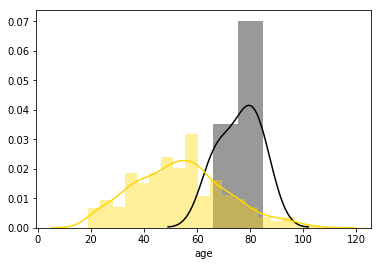

In [173]:
# sns.distplot(higher_chance['age'].mean())
sns.distplot(higher_chance['age'], color='black')
sns.distplot(lower_chance['age'], color='gold')

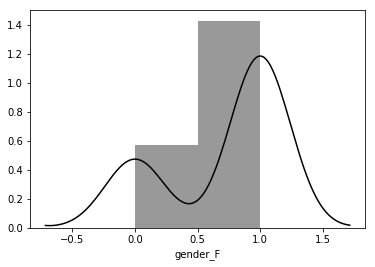

In [180]:
sns.distplot(higher_chance['gender_F'], color='black', bins=2)

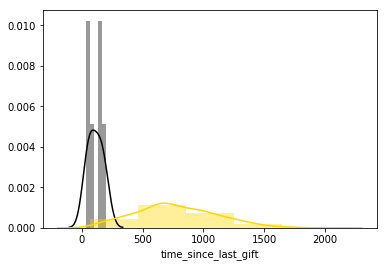

In [175]:
sns.distplot(higher_chance['time_since_last_gift'], color='black', bins = 5)
sns.distplot(lower_chance['time_since_last_gift'], color='gold',  bins = 5)